In [1]:
import pandas as pd
import numpy as np
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
from sklearn.tree import export_graphviz

import IPython, graphviz


import sklearn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle

traindf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/train.csv')
testdf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/test.csv')
genders = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/datamanipulation/genderize.csv')

In [2]:
traindf.dropna(inplace = True)

In [3]:
def split_names(df):
    # Create new columns for first name and last name
    df['FirstName'] = df['Name'].apply(lambda x: x.split()[0] if pd.notna(x) else pd.NA)
    df['LastName'] = df['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else pd.NA)
    df.drop(columns = ['Name'],inplace = True)
    return df
traindf = split_names(traindf)
testdf = split_names(testdf)

In [4]:
random_rows = traindf.sample(n=5000, random_state=42) 
rand = random_rows[['PassengerId','FirstName','LastName']].copy()
rand.to_csv('names.csv',index = False)

In [5]:
def split_group_number(df):
    df['Group'] = df['PassengerId'].apply(lambda x: x.split("_")[0] if pd.notna(x) else pd.NA)
    df['GroupNumber'] = df['PassengerId'].apply(lambda x: x.split("_")[1] if pd.notna(x) else pd.NA)
    return df
traindf = split_group_number(traindf)
testdf = split_group_number(testdf)

In [9]:
lis = []
for i in range(4999):
    if namsor.iloc[i].probabilityCalibrated > 0.80:
        lis.append(namsor.iloc[i].likelyGender)
    else:
        lis.append(pd.NA)


In [7]:
lis

[]

In [8]:
namsor = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/datamanipulation/namsor_genderize-name_names.csv')

In [96]:
len(rand)

4999

In [10]:
namsor.head()

,Unnamed: 0,firstName,lastName,apiVersion,script,id,firstName.1,lastName.1,likelyGender,genderScale,score,probabilityCalibrated
0,PassengerId,FirstName,LastName,namsor_api_2.0.28,LATIN,9187a2f7-b006-4dc9-9f6b-4a2428ad205e,FirstName,LastName,female,0.245094,1.440445,0.622547
1,9014_01,Nunkib,Dishearly,namsor_api_2.0.28,LATIN,76475dcb-216d-4599-84ce-09cb444ad7db,Nunkib,Dishearly,male,-0.218959,1.320098,0.609479
2,8615_02,Jarena,Buckentry,namsor_api_2.0.28,LATIN,2cc0e002-1155-490e-8384-1fb8e2e1ba43,Jarena,Buckentry,female,0.985210,11.735972,0.992605
3,0358_01,Ronna,Connon,namsor_api_2.0.28,LATIN,38ab85e6-4604-4d8e-9995-b4b3f9d36f60,Ronna,Connon,female,0.985396,11.779261,0.992698
4,2732_02,Jilly,Hurles,namsor_api_2.0.28,LATIN,417dffa0-fe36-4ab5-ab38-d3642453cbda,Jilly,Hurles,female,0.968500,9.954540,0.984250


In [11]:
rand = rand.iloc[:4999].copy()
rand['Gender'] = lis

In [12]:
traindf

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Gravior,Noxnuther,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Kurta,Mondalley,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Fayey,Connon,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Celeon,Hontichre,9280,01


In [16]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'FirstName', 'LastName', 'Group', 'GroupNumber'],
      dtype='object')

<Axes: >

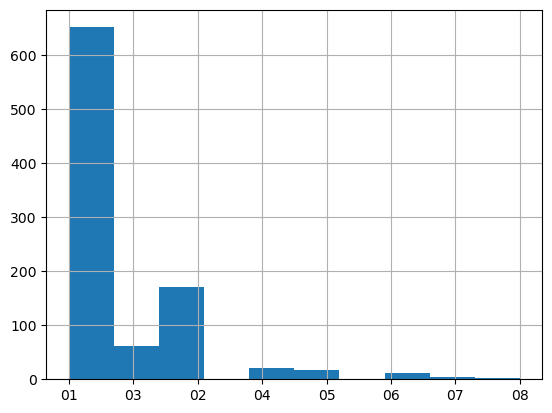

In [24]:
traindf.loc[rand[rand.Gender == 'male'].index].GroupNumber.hist()

<Axes: >

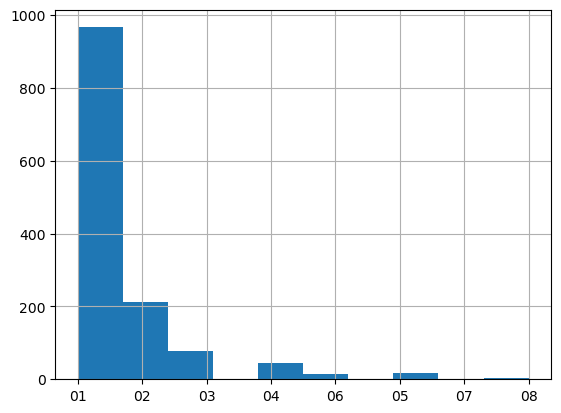

In [25]:
traindf.loc[rand[rand.Gender == 'female'].index].GroupNumber.hist()